<a href="https://colab.research.google.com/github/mugeki/ml-clustering/blob/main/Tugas1_ML_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mugeki/ml-clustering/main/kendaraan_train.csv")
df = df.drop(columns="Tertarik")
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0


# **Data Preprocessing**

### Handle Outlier

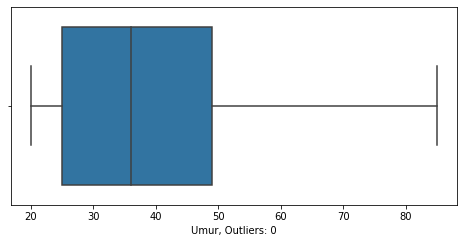

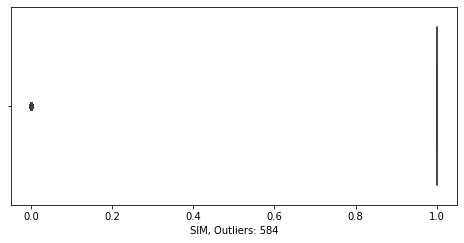

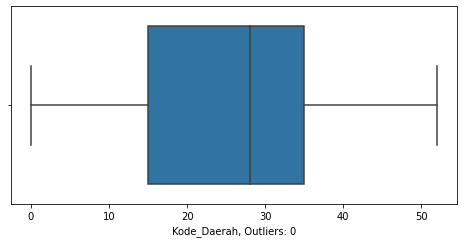

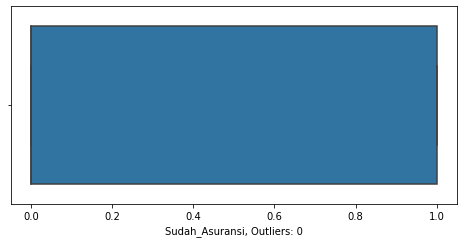

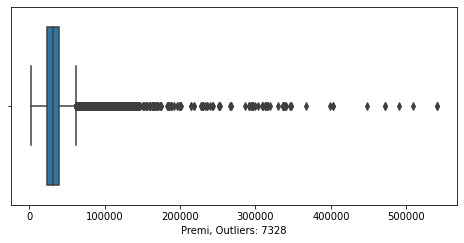

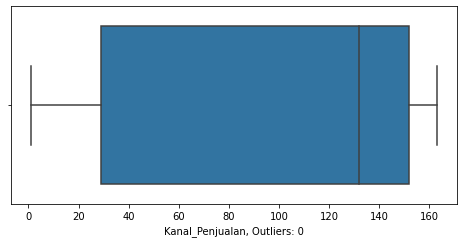

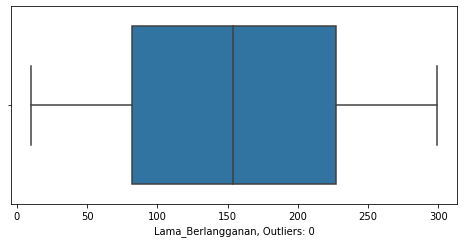

In [ ]:
# Cek jumlah outlier
def count_outliers(col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_whisker = Q1 - 1.5 * IQR
  upper_whisker = Q3 + 1.5 * IQR
  return ((df[col] < lower_whisker) | (df[col] > upper_whisker)).sum()

def print_boxplot():
  for col in df.columns:
    if col != "id" and df[col].dtypes != "object":
      plt.figure(figsize=(8,8))
      ax = plt.subplot(211)
      sns.boxplot(data=df, x=col).set(xlabel=f"{col}, Outliers: {count_outliers(col)}")

print_boxplot()

[Text(0.5, 0, 'Premi, Outliers: 0')]

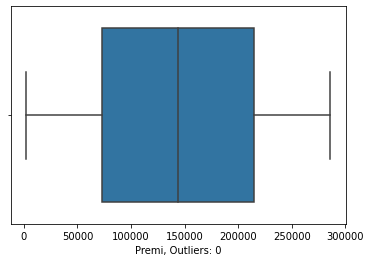

In [ ]:
# Hapus outlier data premi menggunakan metode IQR (Interquartile Range)

col = "Premi"
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

df[col] = df[df[col] < upper_whisker]
df[col] = df[df[col] > lower_whisker]

sns.boxplot(data=df, x=col).set(xlabel=f"{col}, Outliers: {count_outliers(col)}")

### Handle Data Kosong

In [ ]:
# Cek jumlah data kosong
df.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                23692
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [ ]:
# Cek persentase data kosong
clean_df = df.dropna()
missing_percent = len(clean_df)/len(df) * 100
print("Persentase Data Kosong: ", missing_percent)

Persentase Data Kosong:  57.835224310869


In [ ]:
# Replace data kosong dengan mean & mode
df["Jenis_Kelamin"] = df["Jenis_Kelamin"].replace(np.NaN, df["Jenis_Kelamin"].mode()[0])
df["Umur"] = df["Umur"].replace(np.NaN, df["Umur"].mean())
df["SIM"] = df["SIM"].replace(np.NaN, df["SIM"].mode()[0])
df["Kode_Daerah"] = df["Kode_Daerah"].replace(np.NaN, df["Kode_Daerah"].mode()[0])
df["Sudah_Asuransi"] = df["Sudah_Asuransi"].replace(np.NaN, df["Sudah_Asuransi"].mode()[0])
df["Umur_Kendaraan"] = df["Umur_Kendaraan"].replace(np.NaN, df["Umur_Kendaraan"].mode()[0])
df["Kendaraan_Rusak"] = df["Kendaraan_Rusak"].replace(np.NaN, df["Kendaraan_Rusak"].mode()[0])
df["Premi"] = df["Premi"].replace(np.NaN, df["Premi"].mean())
df["Kanal_Penjualan"] = df["Kanal_Penjualan"].replace(np.NaN, df["Kanal_Penjualan"].mode()[0])
df["Lama_Berlangganan"] = df["Lama_Berlangganan"].replace(np.NaN, df["Lama_Berlangganan"].mean())
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,143780.436963,152.0,97.0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,143780.436963,29.0,158.0
2,3,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,143780.436963,160.0,119.0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,143780.436963,124.0,63.0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Pernah,143780.436963,88.0,194.0


In [ ]:
# Cek jumlah data kosong
df.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

### Handle Data Categorical

In [ ]:
# Kolom Jenis_Kelamin
col = "Jenis_Kelamin"
condlist = [df[col].str.contains("Wanita"), df[col].str.contains("Pria")]
choicelist = [0, 1]
df[col] = np.select(condlist, choicelist)

# Kolom Umur_Kendaraan
col = "Umur_Kendaraan"
condlist = [df[col].str.contains("< 1 Tahun"), df[col].str.contains("1-2 Tahun"), df[col].str.contains("> 2 Tahun")]
choicelist = [0, 1, 2]
df[col] = np.select(condlist, choicelist)

# Kolom Kendaraan_Rusak
col = "Kendaraan_Rusak"
condlist = [df[col].str.contains("Tidak"), df[col].str.contains("Pernah")]
choicelist = [0, 1]
df[col] = np.select(condlist, choicelist)

df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,0,30.0,1.0,33.0,1.0,0,0,143780.436963,152.0,97.0
1,2,1,48.0,1.0,39.0,0.0,2,1,143780.436963,29.0,158.0
2,3,1,21.0,1.0,46.0,1.0,0,0,143780.436963,160.0,119.0
3,4,0,58.0,1.0,48.0,0.0,1,0,143780.436963,124.0,63.0
4,5,1,50.0,1.0,35.0,0.0,2,1,143780.436963,88.0,194.0


### Pemilihan Fitur

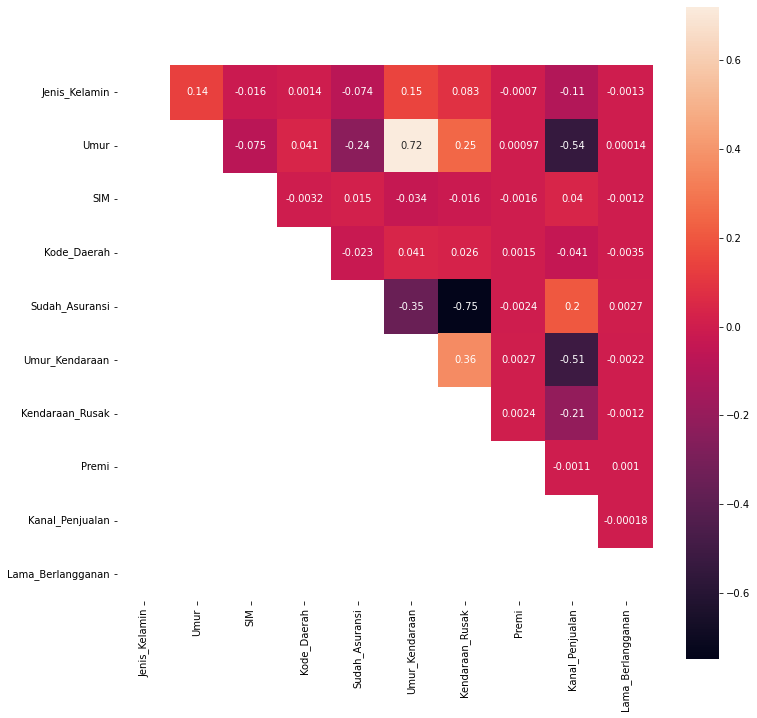

In [ ]:
# Cek korelasi seluruh feature menggunakan heatmap
plt.figure(figsize=(12, 12))
corr_df = df.drop(columns="id").corr()
corr_df = corr_df.mask(np.tril(np.ones(corr_df.shape)).astype(np.bool))
sns.heatmap(corr_df, annot=True, square=True);

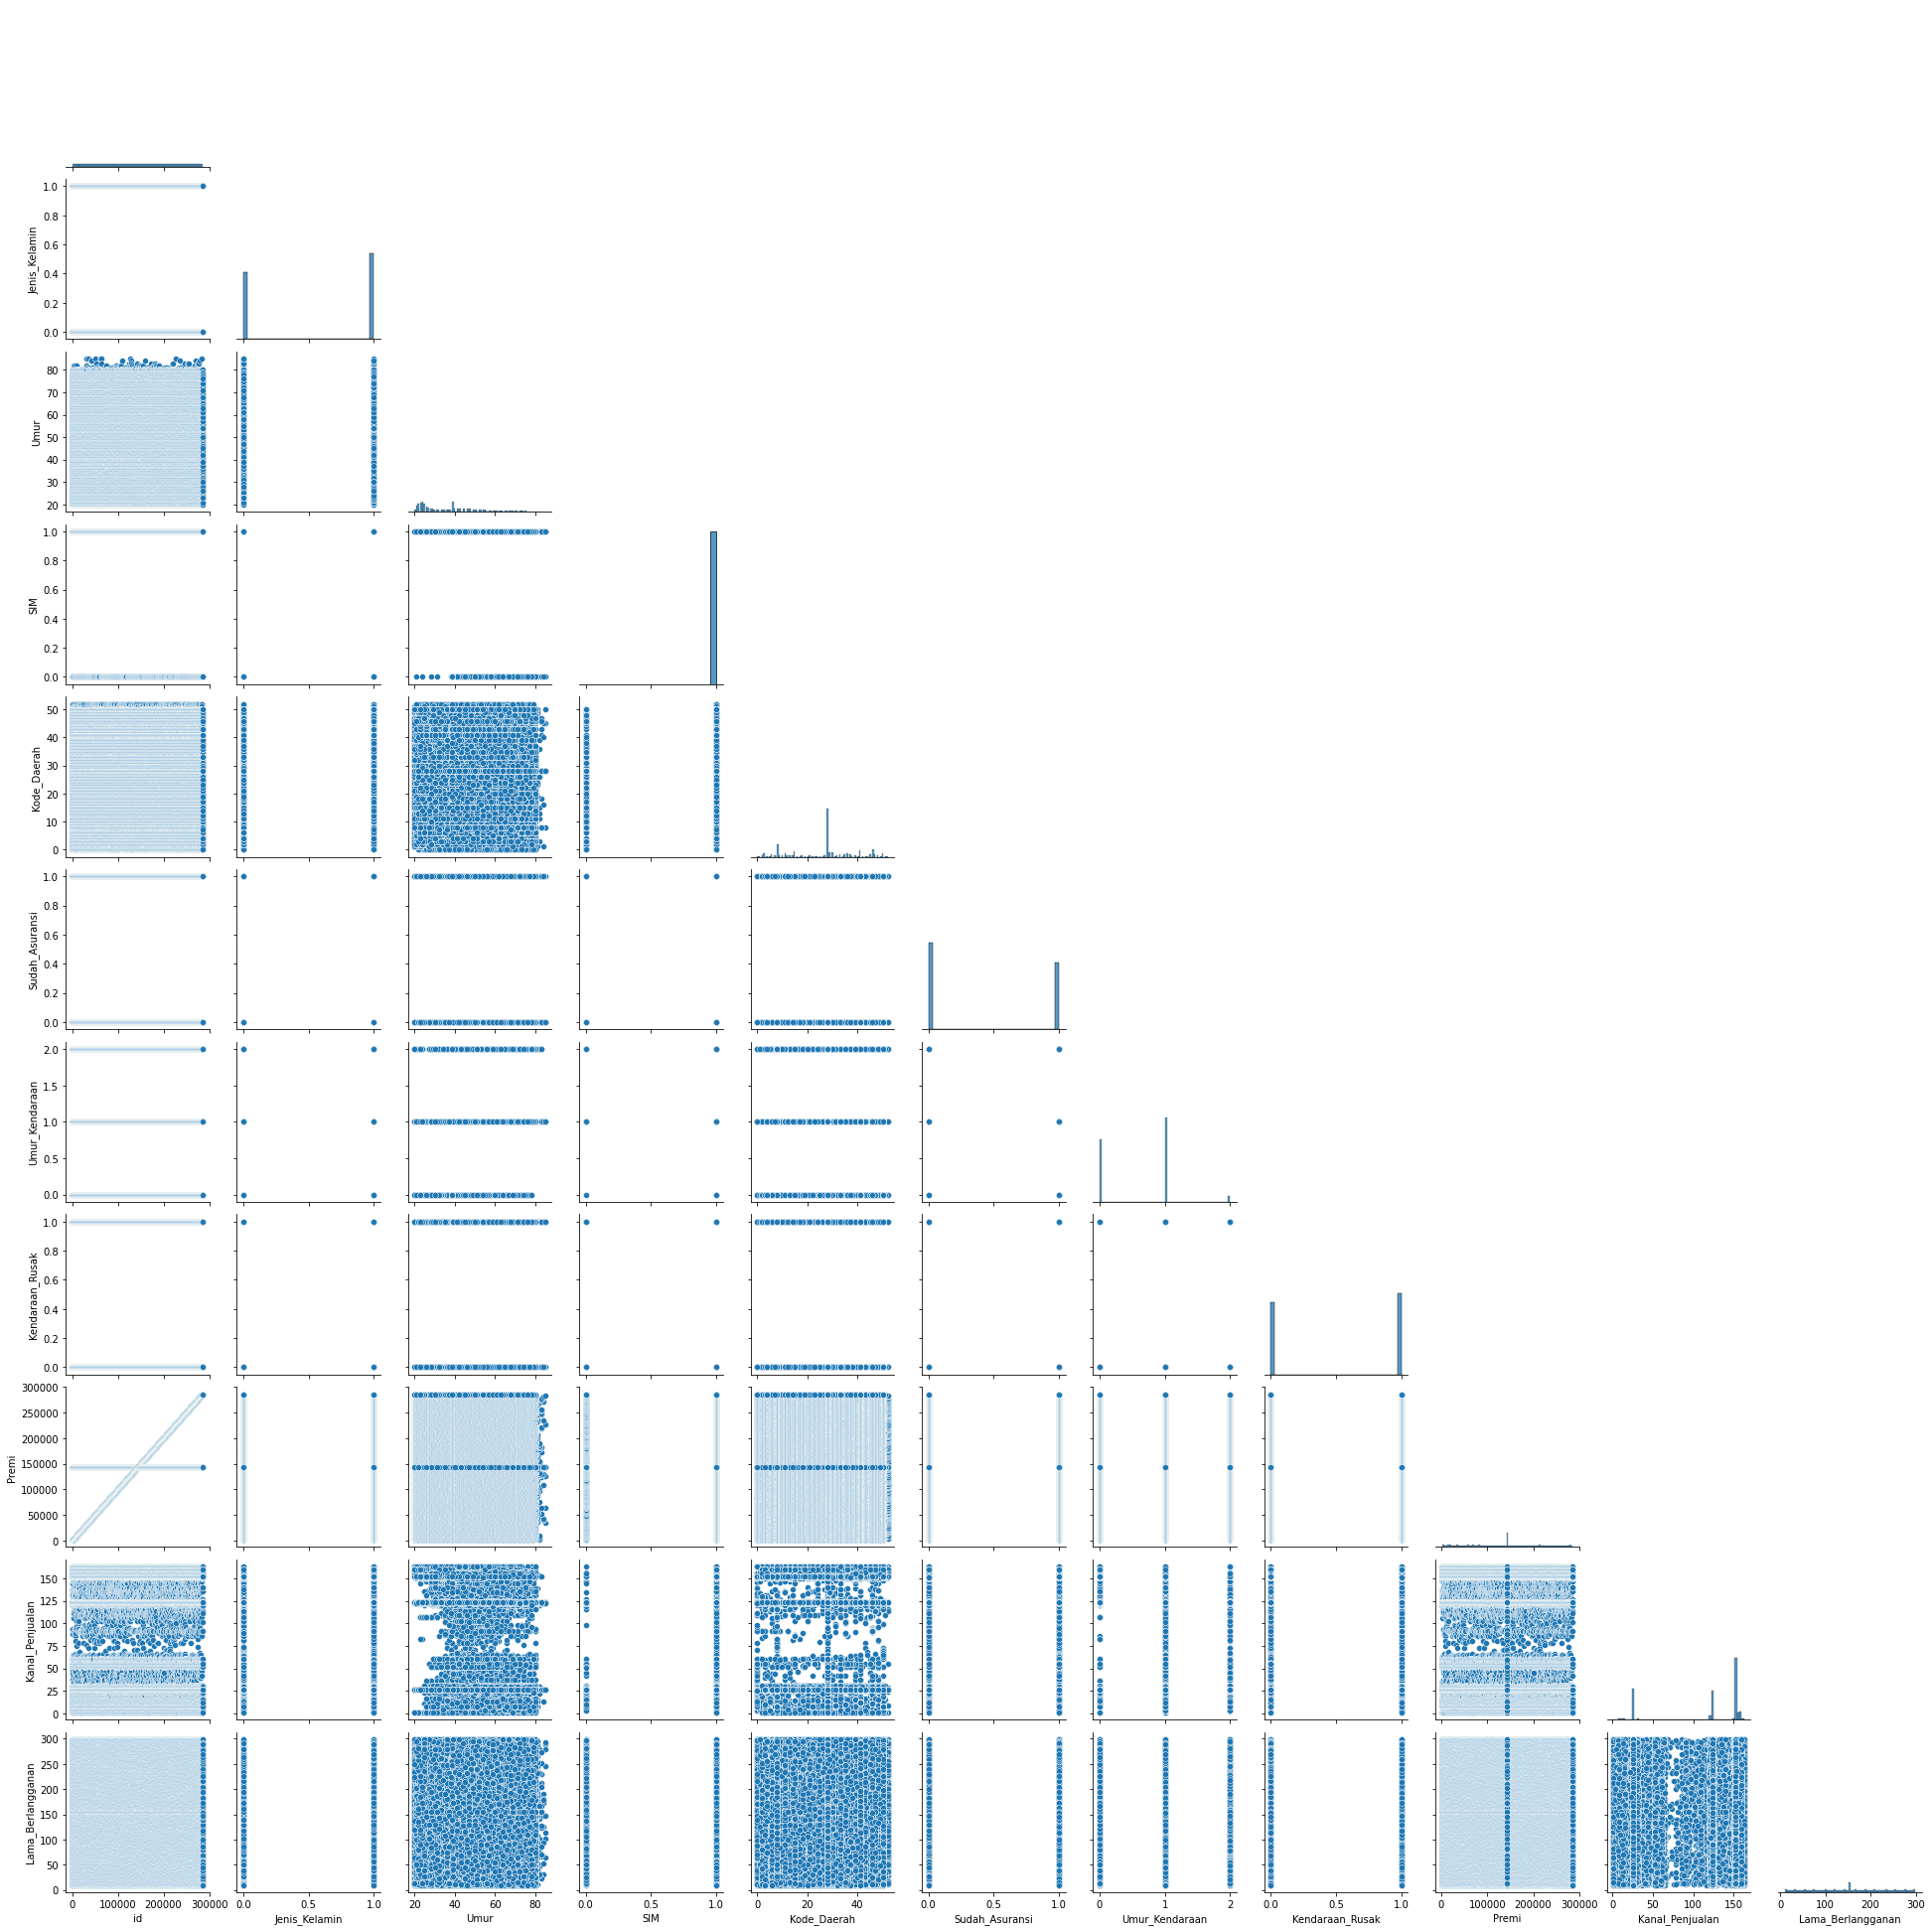

In [ ]:
# Cek scatter plot untuk seluruh feature
sns.pairplot(df, corner=True)

In [ ]:
# Pilih feature "Umur" dan "Kanal_Penjualan" sebagai data untuk pemodelan
features = ["Umur","Kanal_Penjualan"]
df = df[features]
df.head()

,Umur,Kanal_Penjualan
0,30.0,152.0
1,48.0,29.0
2,21.0,160.0
3,58.0,124.0
4,50.0,88.0


### Normalisasi Data

In [ ]:
normalized_df=(df-df.mean())/df.std()
normalized_df.head()

,Umur,Kanal_Penjualan
0,-0.584494,0.709303
1,0.605069,-1.587901
2,-1.179276,0.858715
3,1.265937,0.186362
4,0.737242,-0.485990


# **Algoritma K-Means**

In [ ]:
def euclid_dist(p,q):
      return np.sqrt(np.sum((p - q) ** 2))

class Custom_KMeans:
  def __init__(self, k, tolerance, max_iter):
        self.k = k
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.clusters = {i:[] for i in range(self.k)}
     
  def fit(self,data):
        # Mengkonversi data menjadi array
        data = np.array(data)

        # Membuat k-titik centroid dengan nilai acak
        self.centroids = {i:data[np.random.randint(0,len(data))] for i in range(self.k)}
        print(f"Initial Centroids:\n{self.centroids}\n")

        for i in range(self.max_iter):
            # Mencari nilai jarak antara data dengan centroid menggunakan rumus euclidean
            # Jarak yang terpendek akan dimasukkan ke dalam cluster
            for featureset in data:
                distances = [euclid_dist(featureset, self.centroids[centroid]) for centroid in self.centroids]
                cluster = distances.index(min(distances))
                self.clusters[cluster].append(featureset)

            # Membuat salinan centroid saat ini untuk nantinya dibandingkan
            original_centroids = dict(self.centroids)

            # Mencari titik centroid menggunakan rerata dari cluster
            for cluster in self.clusters:
              self.centroids[cluster] = np.average(self.clusters[cluster],axis=0)
            print(f"Centroids iter-{i}:\n{self.centroids}\n")
            
            # Melakukan pengecekan konvergensi nilai centroid
            # Batas konvergen diambil berdasarkan tolerance yang diberikan
            optimized = True
            for centroid in self.centroids:
                original_centroid = original_centroids[centroid]
                current_centroid = self.centroids[centroid]
                converged = np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tolerance
                if converged:
                    optimized = False
            # Algoritma akan berhenti ketika konvergensi sudah tercapai
            if optimized:
                break
        return self.clusters, self.centroids

# **Main**

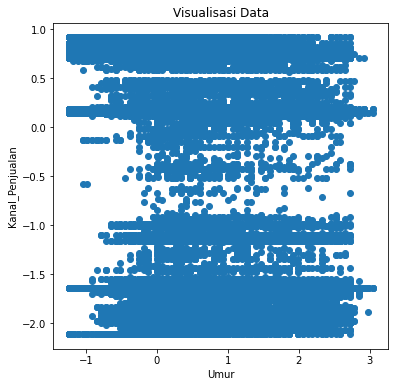

In [ ]:
# Visualisasi data sebelum dilakukan clustering
plt.figure(figsize=(6, 6))
plt.scatter(normalized_df[features[0]], normalized_df[features[1]])
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Visualisasi Data");

In [ ]:
kmean = Custom_KMeans(k=3, tolerance=0.001, max_iter=10)
clusters, centroids = kmean.fit(normalized_df)

Initial Centroids:
{0: array([-0.91492828,  0.70930327]), 1: array([ 0.8033293 , -1.64393036]), 2: array([0.47289515, 0.18636247])}

Centroids iter-0:
{0: array([-0.8876574 ,  0.70192026]), 1: array([ 0.77284342, -1.65407638]), 2: array([0.66172404, 0.37327517])}

Centroids iter-1:
{0: array([-0.87903632,  0.69680021]), 1: array([ 0.7726146, -1.6540645]), 2: array([0.67869134, 0.37485669])}

Centroids iter-2:
{0: array([-0.87510715,  0.69503197]), 1: array([ 0.77253834, -1.65406053]), 2: array([0.68618902, 0.37483776])}

Centroids iter-3:
{0: array([-0.87292287,  0.69416467]), 1: array([ 0.77249588, -1.65405875]), 2: array([0.69033412, 0.37466729])}

Centroids iter-4:
{0: array([-0.87094606,  0.69365781]), 1: array([ 0.77247041, -1.65405767]), 2: array([0.69382188, 0.37412879])}

Centroids iter-5:
{0: array([-0.86963315,  0.69332059]), 1: array([ 0.77245343, -1.65405696]), 2: array([0.69616528, 0.3737679 ])}

Centroids iter-6:
{0: array([-0.86869377,  0.69308043]), 1: array([ 0.7724413

In [ ]:
clustered_featureset1 = []
clustered_featureset2 = []
clustered_cluster = []

for i in centroids:
  for featureset in clusters[i]:
    clustered_featureset1.append(featureset[0])
    clustered_featureset2.append(featureset[1])
    clustered_cluster.append(i)

clustered = {features[0]:clustered_featureset1, features[1]:clustered_featureset2, "Cluster":clustered_cluster}
clustered_df = pd.DataFrame(data=clustered)
clustered_df.sample(10)

,Umur,Kanal_Penjualan,Cluster
2533662,1.067677,0.186362,2
283959,-1.047102,0.709303,0
2104830,0.671156,0.186362,2
1656405,-1.047102,-1.643930,1
763656,-0.848841,0.709303,0
448175,-0.584494,0.709303,0
880471,-0.782755,0.709303,0
974148,-1.047102,0.709303,0
1509343,1.662458,-1.643930,1
1648294,0.010287,-1.475842,1


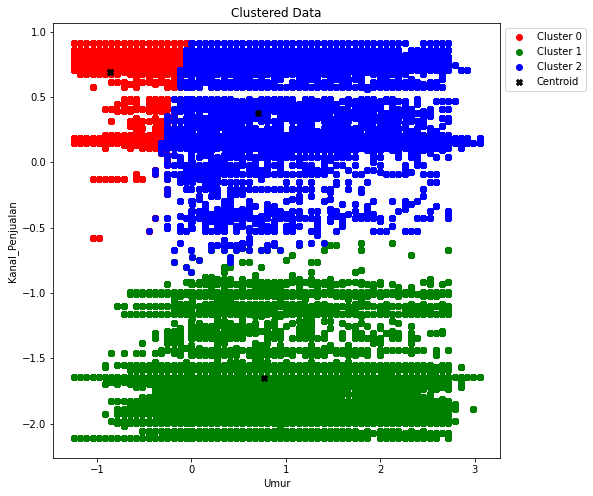

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Clustered Data")
colors = ["r", "g", "b"]

for i in centroids:
    plt.scatter(clustered_df[features[0]][clustered_df["Cluster"] == i], clustered_df[features[1]][clustered_df["Cluster"] == i], color=colors[i], label=f"Cluster {i}")
    plt.scatter(centroids[i][0], centroids[i][1], color="k", marker="X")
plt.scatter(centroids[0][0], centroids[0][1], color="k", label="Centroid", marker="X")

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.show()

# **Evaluasi**

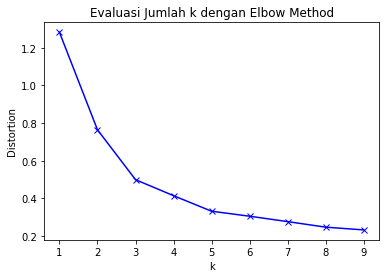

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k).fit(normalized_df)
    model.fit(normalized_df)
    distortions.append(sum(np.min(cdist(normalized_df, model.cluster_centers_, "euclidean"), axis=1)) / normalized_df.shape[0])

plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("Evaluasi Jumlah k dengan Elbow Method")
plt.show()